In [342]:
import pandas as pd 
import numpy as np 
from langdetect import detect

## Get data

In [436]:
#data = pd.read_excel('List_Songs-HIPPOP.xlsx')
data = pd.read_csv('List_Songs_Lyrics_test2.csv',lineterminator='\n')


# Overview of the rows that are dropped

In [437]:

print('Initial number of songs', len(data))

data1 = data[data.Lyrics != 'NONE']

print('After removal of songs with no lyrics' , len(data1))

data2 = data1.loc[data1['Lyrics'].apply(detect) == 'en']
print('Number of remaining songs that are not in English', len(data2))
 
# Split into two dataframes by genre    
pop_df = data2[['Lyrics','Title','Year']].loc[data2['Genre'] == 'Pop']
hiphop_df = data2[['Lyrics','Title','Year']].loc[data2['Genre'] == 'Hip Hop']

# Inner join to get the songs that are in both
df12 = pd.merge(hiphop_df,pop_df, on=['Title','Year','Lyrics'], how='inner')     #extract common rows with merge
final_hiphop = hiphop_df[~hiphop_df['Lyrics'].isin(df12['Lyrics'])]
final_pop = pop_df[~pop_df['Lyrics'].isin(df12['Lyrics'])]

print('Number of songs that are in both genres (and thus removed twice)',len(df12))

final_hiphop.head(100)

Initial number of songs 1440
After removal of songs with no lyrics 1076
Number of remaining songs that are not in English 968
Number of songs that are in both genres 358


,Lyrics,Title,Year
960,Uh uh uh\nI just gotta bring it to they attent...,#1,2002
961,\n\nChorus (2x):(Mannie Fresh)\nAll the nigga...,#1,2002
962,[Rich Nice] What I want you to understand is...,#1 Player,1995
963,Nigga can't out-stunt me when it come to these...,#1 Stunna,2000
964,Girl it's your birthday (birthday) in here (in...,#BDAY,NONE
965,Grind mode grind mode bitch I'm on grind mod...,#Grindmode,NONE
968,Big man! When I talk hear weh yuh fi do?\nShu...,#Twerkit,NONE
970,Rich girl and you've come to far 'cause you k...,$$$ Girlz,2004
973,Uh uh uh You ready B? Let's go get 'em Loo...,'03 Bonnie & Clyde,2002
974,Uh uh uh You ready B? Let's go get 'em Loo...,'03 Bonnie & Clyde,2003


# Data tidying function

In [419]:
import spacy
import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer
parser = English()

# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [430]:
def tidy_data(df):
    start_len = len(df)
    ### Function that takes as input the dataframe and outputs the clean dataframe 
    
    # Drop rows where Lyrics = None
    df = df[df.Lyrics != 'NONE']
    
    # Get genre dummies 
    dummy=pd.get_dummies(df["Genre"])
    df = pd.concat([df, dummy], axis=1)
    
    # Detect language and drop all rows where language is not English
    df['Language'] = df['Lyrics'].apply(detect)
    df = df.loc[df['Language'] == 'en']
    df = df.drop(['Language'], axis=1)
    
    # Find lyrics that are in both genres and remove them both 
    # Split into two dataframes by genre    
    pop_df = data2[['Lyrics','Title','Year']].loc[data2['Genre'] == 'Pop']
    hiphop_df = data2[['Lyrics','Title','Year']].loc[data2['Genre'] == 'Hip Hop']

    # Inner join to get the songs that are in both
    df12 = pd.merge(hiphop_df,pop_df, on=['Title','Year','Lyrics'], how='inner')     #extract common rows with merge
    final_hiphop = hiphop_df[~hiphop_df['Lyrics'].isin(df12['Lyrics'])]
    final_pop = pop_df[~pop_df['Lyrics'].isin(df12['Lyrics'])]
    
    #Combine
    hiphop_pop_concat = pd.concat([final_hiphop,final_pop])
    #Put 'Genres' back on
    final_df = pd.merge(hiphop_pop_concat,pd.DataFrame(df[['Lyrics','Genre']]),on='Lyrics',how='left')
    
    #df = df.drop_duplicates(subset=['Lyrics', 'Title', 'Year'], keep=False)
    final_df = final_df.drop_duplicates()
    
    #final_df['Year'].replace('NONE',None, inplace=True)
    
    #Apply tokenizer
    final_df['Lyrics'] = final_df['Lyrics'].apply(spacy_tokenizer)
    
    tidied_len = len(final_df)
    print('Function removed', start_len - tidied_len, 'out of', start_len, 'rows')
    
    return final_df #(df)

In [431]:
data = tidy_data(data)
data.head(10)

Function removed 1141 out of 1440 rows


In [434]:

#len(data.loc[data['Genre'] == 'Hip Hop'])
#len(data.loc[data['Genre'] == 'Pop'])

0

# Descriptive analysis - the year variable

Ideas: 
- Do we swear more now than before? 
- Do newer songs use more disrespectful language towards women? 
- Which genres swear more? (obvious...) 

Calculate avg number of swear words per song.
- Get list of swear words 
- Count how many swear words in each song - store number in new column 
- avg(number_of_swearwords) group by year, genre 


In [334]:
# Differences in 
# Do we swear more now than before? (get list of swear-words and count by year)
profanity_url = 'http://www.bannedwordlist.com/lists/swearWords.txt'
#profanity = pd.read_csv(profanity_url, header=None, sep = '\n')

import requests

profanity = requests.get(profanity_url).text
profanity = set(profanity.split('\r\n'))

extras = {'f*ck','f**k','f*cked','f*ckin','f*cking','nigga', 'niggas', 'b*tch', 'bitches', 'b*tches'}

prof = profanity.union(extras)

In [335]:
def profanity_check(document, dictionary):
    list_match = []
    
    for word in document: 
        if word in dictionary:
             list_match.append(word)

    return len(list_match)
    

In [336]:
data['Profanity_count'] = data['Lyrics'].apply(profanity_check, args=[prof])
data['Year_decade'] = pd.to_numeric(data['Year'])//10*10

data.head()

,Unnamed: 0,Lyrics,Title,Year,Genre,Hip Hop,Pop,Profanity_count,Year_decade
960,960,"[uh, uh, uh, bring, attention, dirty, watch, t...",#1,2002,Hip Hop,1,0,4,2000
961,961,"[chorus, 2x):(mannie, fresh, niggas, buck, buc...",#1,2002,Hip Hop,1,0,19,2000
962,962,"[rich, nice, want, understand, mackin, big, bu...",#1 Player,1995,Hip Hop,1,0,13,1990
963,963,"[nigga, stunt, come, f*ckin, car, nigga, belie...",#1 Stunna,2000,Hip Hop,1,0,51,2000
964,964,"[girl, birthday, birthday, tonight, tonight, g...",#BDAY,2000,Hip Hop,1,0,9,2000


In [337]:
g1 = pd.DataFrame(data.groupby(['Year_decade', 'Genre']).mean()).reset_index()

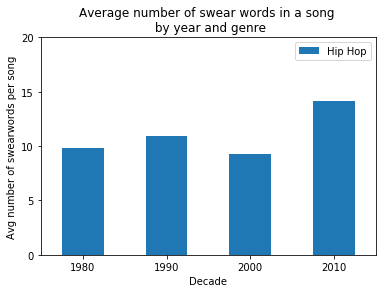

In [338]:
# Only continue with songs from 1980's and forth
g1 = g1.loc[g1['Year_decade'] >= 1980]

# Create bar plot 
import matplotlib.pyplot as plt 

g1 = g1[['Genre', 'Year_decade', 'Profanity_count']]

ax = g1.pivot('Year_decade','Genre',  'Profanity_count').plot(kind='bar')
ax.set_title('Average number of swear words in a song \n by year and genre')
plt.ylabel('Avg number of swearwords per song')
plt.xlabel('Decade')
plt.xticks(rotation='horizontal')
plt.yticks(np.arange(0, 25, step=5))

plt.legend(loc=1)
plt.show()


